In [3]:
# Import necessary libraries
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris_X, iris_y = datasets.load_iris(return_X_y=True)

# Split train:test = 8:2
X_train, X_test, y_train, y_test = train_test_split(
    iris_X,
    iris_y,
    test_size=0.2,
    random_state=42
)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

# Predict and Evaluate test set
y_pred = knn_classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [4]:
# Import library
!pip install -q datasets


[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import numpy as np
from datasets import load_dataset
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
# Load IMDB dataset
imdb = load_dataset("imdb")
imdb_train, imdb_test = imdb['train'], imdb['test']
# Convert text to vector using BoW
vectorizer = CountVectorizer(max_features=100)
X_train = vectorizer.fit_transform(imdb_train['text']).toarray()
X_test = vectorizer.transform(imdb_test['text']).toarray()

y_train = np.array(imdb_train['label'])
y_test = np.array(imdb_test['label'])
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Build KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=1, algorithm='ball_tree')
knn_classifier.fit(X_train, y_train)
# predict test set and evaluate
y_pred = knn_classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.5962

In [8]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

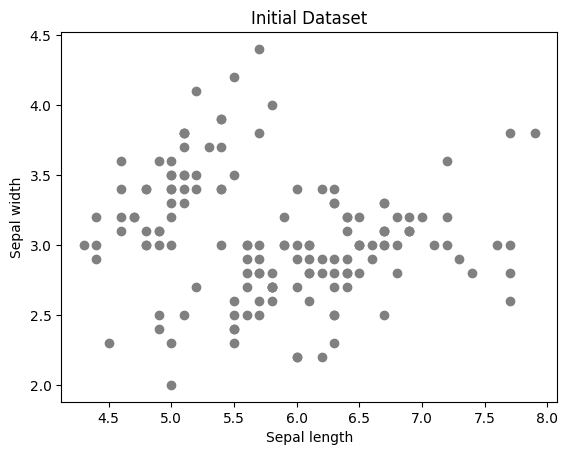

In [10]:
iris_dataset = load_iris()
data = iris_dataset.data
data = iris_dataset.data[:, :2]
# Plot data
plt.scatter(data[:, 0], data[:, 1], c='gray')
plt.title("Initial Dataset")
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

In [47]:
class KMeans:
    def __init__(self, k=3, max_iters=100):
        self.k = k                   # Số cụm
        self.max_iters = max_iters   # Số vòng lặp tối đa
        self.centroids = None        # Tọa độ tâm cụm
        self.clusters = None         # Cụm của từng điểm dữ liệu

    def initialize_centroids(self, data):
        """
        Khởi tạo ngẫu nhiên tâm cụm
        Parameters:
            data (numpy.ndarray): dữ liệu đầu vào cần phân cụm
        Return:
            None
        """
        np.random.seed(42)
        self.centroids = data[np.random.choice(data.shape[0], self.k, replace=False)]

    def euclidean_distance(self, x1, x2):
        """
        Tính khoảng cách Euclid giữa hai điểm dữ liệu
        Parameters:
            x1 (numpy.ndarray): điểm dữ liệu 1
            x2 (numpy.ndarray): điểm dữ liệu 2
        Return:
            float: khoảng cách Euclid
        """
        return np.sqrt(np.sum(np.power(x1 - x2, 2)))

    def assign_clusters(self, data):
        """
        Phân cụm dữ liệu
        Parameters:
            data (numpy.ndarray): dữ liệu đầu vào cần phân cụm
        Return:
            numpy.ndarray: mảng chứa cluster của từng điểm dữ liệu
        """

        # Tính toán khoảng cách giữa mỗi điểm dữ liệu (data point) và tâm (centroids) bằng cách sử dụng hàm euclidean_distance
        distances = np.array([[self.euclidean_distance(x, centroid) for centroid in self.centroids] for x in data])

        # print(np.argmin(distances, axis=1)) # Có thể in ra dòng này để thấy cách biểu diễn mảng chứa allocation
        return np.argmin(distances, axis=1)

    def update_centroids(self, data):
        """
        Cập nhật tâm cụm
        Parameters:
            data (numpy.ndarray): dữ liệu đầu vào cần phân cụm
        Return:
            numpy.ndarray: mảng chứa tâm cụm mới
        """
        return np.array([data[self.clusters == i].mean(axis=0) for i in range(self.k)])

    def fit(self, data):
        """
        Hàm huấn luyện
        Parameters:
            data (numpy.ndarray): dữ liệu đầu vào cần phân cụm
        Return:
            None
        """
        # Gọi tới phương thức khởi tạo ngẫu nhiên tâm cụm
        self.initialize_centroids(data)
        self.plot_clusters(data, 0)

        for i in range(self.max_iters):
            # Gán cụm cho các data point gần nhất
            self.clusters = self.assign_clusters(data)

            # Visualize các cụm và tâm cụm tại iteration này
            self.plot_clusters(data, i)

            # Dựa vào các data point của từng cụm, dịch chuyển tâm cụm tới vị trí trung tâm (tính mean) của cụm
            new_centroids = self.update_centroids(data)

            # Nếu tâm cụm không di chuyển, dừng lại
            if np.all(self.centroids == new_centroids):
                break

            # Nếu tâm cụm có di chuyển, thực hiện lại vòng lặp với các giá trị tâm cụm mới
            self.centroids = new_centroids
            self.plot_clusters(data, i)

        # Plot kết quả cuối cùng của các cụm, tâm cụm
        return self.plot_final_clusters(data),self.centroids
        


    def plot_clusters(self, data, iteration):
        """
        Vẽ các cụm và tâm cụm tại mỗi iteration
        Parameters:
            data (numpy.ndarray): dữ liệu đầu vào cần phân cụm
            iteration (int): iteration hiện tại
        Return:
            None
        """
        plt.scatter(data[:, 0], data[:, 1], c=self.clusters, cmap='viridis', marker='o', alpha=0.6)
        plt.scatter(self.centroids[:, 0], self.centroids[:, 1], s=300, c='red', marker='x')
        plt.title(f"Iteration {iteration + 1}")
        plt.xlabel('Sepal length')
        plt.ylabel('Sepal width')
        plt.show()

    def plot_final_clusters(self, data):
        """
        Vẽ các cụm và tâm cụm cuối cùng
        Parameters:
            data (numpy.ndarray): dữ liệu đầu vào cần phân cụm
        Return:
            None
        """
        plt.scatter(data[:, 0], data[:, 1], c=self.clusters, cmap='viridis', marker='o', alpha=0.6)
        plt.scatter(self.centroids[:, 0], self.centroids[:, 1], s=300, c='red', marker='x')
        plt.title("Final Clusters and Centroids")
        plt.xlabel('Sepal length')
        plt.ylabel('Sepal width')
        plt.show()

In [ ]:
kmeans = KMeans(k=2)
kmeans.fit(data)

In [ ]:
kmeans = KMeans(k=3)
kmeans.fit(data)
kmeans = KMeans(k=4)
kmeans.fit(data)

In [54]:
iris_dataset.data[:,:2]

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4100\3098811634.py:99: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data[:, 0], data[:, 1], c=self.clusters, cmap='viridis', marker='o', alpha=0.6)


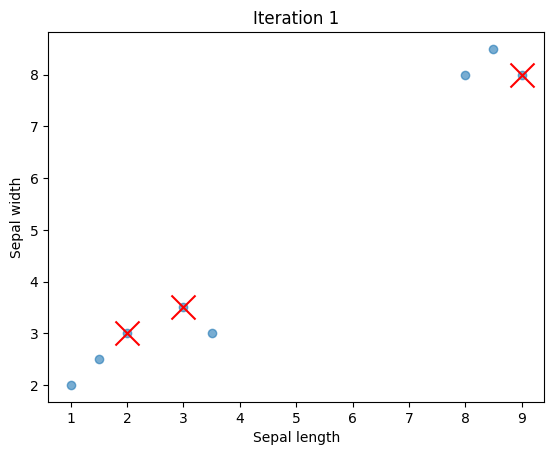

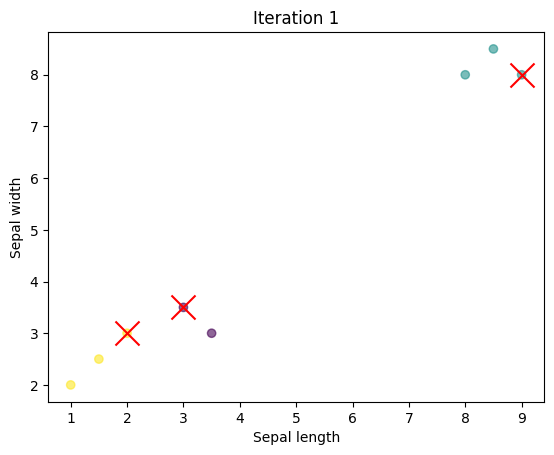

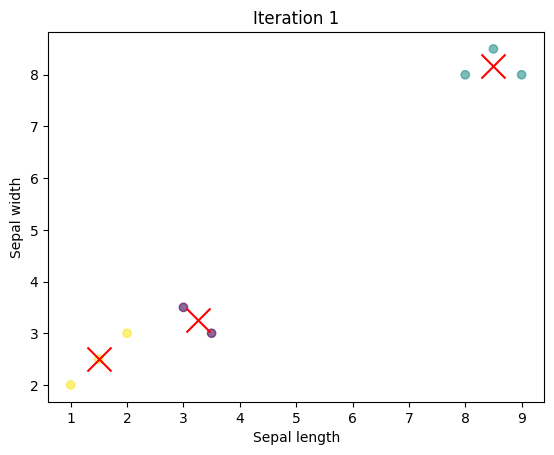

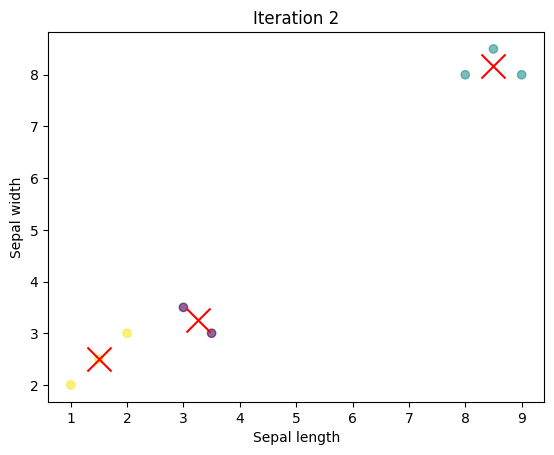

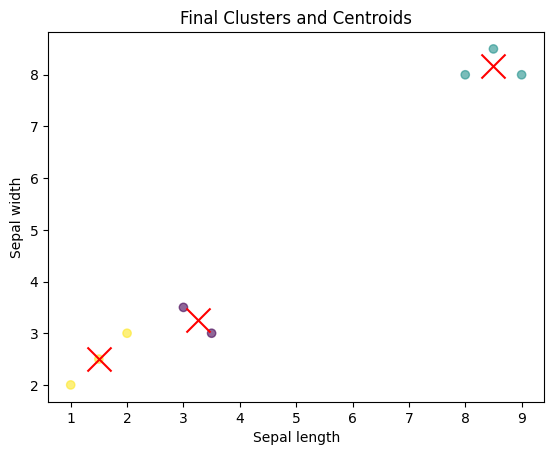

(None,
 array([[3.25      , 3.25      , 2.25      ],
        [8.5       , 8.16666667, 8.        ],
        [1.5       , 2.5       , 1.33333333]]))

In [56]:
data_2 = np.array([
    [2.0, 3.0, 1.5],
    [3.0, 3.5, 2.0],
    [3.5, 3.0, 2.5],
    [8.0, 8.0, 7.5],
    [8.5, 8.5, 8.0],
    [9.0, 8.0, 8.5],
    [1.0, 2.0, 1.0],
    [1.5, 2.5, 1.5]
])
means = KMeans(k=3)
means.fit(data_2)